In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


In [2]:
# データセットダウンロード
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# データ確認
print(X_train_full.shape)
print(X_train_full.dtype)
print(X_train_full.ndim)

(60000, 28, 28)
uint8
3


In [4]:
# 0~1の範囲にスケーリング
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
print(type(X_valid))
print(X_valid[1].shape)

<class 'numpy.ndarray'>
(28, 28)


In [6]:
# ラベル
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle bot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
# モデル作成
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))   # 1次元配列に変換
model.add(keras.layers.Dense(300, activation="relu"))   # keras.activation.relu
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28])   # 1次元配列に変換
#     keras.layers.Dense(300, activation="relu")   # keras.activation.relu
#     keras.layers.Dense(100, activation="relu")
#     keras.layers.Dense(10, activation="softmax")
# ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
# 層の全てのパラメータを読み書きする。
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.0564044  -0.04144678 -0.03675571 ...  0.01295981  0.046998
  -0.03486746]
 [ 0.02424709 -0.01019524  0.07202914 ...  0.03672518 -0.06193388
  -0.04887697]
 [ 0.03582846  0.06390063  0.04186203 ...  0.01859561 -0.07147468
  -0.02828789]
 ...
 [ 0.05899644 -0.0506262   0.0650717  ... -0.02069245 -0.03500837
  -0.05618371]
 [ 0.03671697  0.00941009 -0.0688282  ... -0.07388484 -0.02099133
   0.07169923]
 [-0.05160169  0.02986374 -0.00999184 ...  0.06290463 -0.03718558
  -0.00089427]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
# コンパイル
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",   # デフォルトでlr=0.01
    metrics=["accuracy"]
)

In [14]:
# 学習
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0101 - accuracy: 0.6631 - val_loss: 0.5268 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5113 - accuracy: 0.8219 - val_loss: 0.4793 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4529 - accuracy: 0.8389 - val_loss: 0.4242 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4137 - accuracy: 0.8555 - val_loss: 0.4245 - val_accuracy: 0.8504
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4023 - accuracy: 0.8593 - val_loss: 0.3887 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3877 - accuracy: 0.8646 - val_loss: 0.3679 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3727 - accuracy: 0.8680 - val_loss: 0.3628 - val_accuracy:

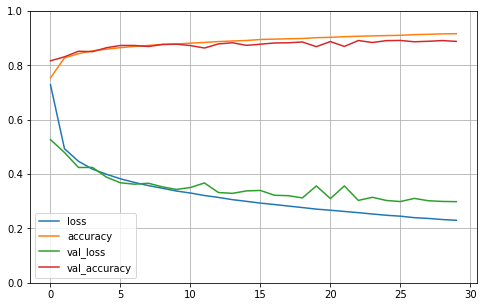

In [15]:
# plot
# 検証誤差は各エポックの最後に計算されるに対し、訓練誤差は各エポックの途中で移動平均を使って計算される。
# = 訓練セットの曲線は半エポック分左にずらしてみる。
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.0868 - accuracy: 0.8304


[75.0868148803711, 0.8303999900817871]

In [17]:
# 予測
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# 予測クラスを表示
import numpy as np
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle bot' 'Pullover' 'Trouser']


/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
